import essential libraries

In [13]:
from eval import eval_classifier
from train import train_classifier
import os
import tensorflow as tf
import numpy as np
from data_utils import *
from functools import partial
from datetime import datetime
import multiprocess

define which gpu to use

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

prepare log book

In [3]:
save_path = datetime.now().strftime("%Y%m%d-%H%M%S/")

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
log = init_logging(save_path, 'Model')

define parameters

In [4]:

# select the model
Model= 'resNet'
# set model and data parameters
max_length = 300
batch_size = 64
input_dim = 18
output_dim = 12
EPOCHS = 100
learning_rate = 0.0001
drop_out = 0.4
# update ++++++++
# name the new gesture
new_gesture_name = 'horns'
# update ++++++++

load dataset

In [5]:
data = np.load('data/train_data.npy',allow_pickle = True)
label = np.load('data/train_label.npy',allow_pickle = True)

load new gesture data

In [6]:
# update ++++++++
new_path = '/desktop/KGS/kgs_online_slim/data/logs'
# update ++++++++

path = new_path+'/*.csv'
new_gesture_list , new_label_list = get_new_gesture_data(path,max_length,input_dim, data_synthesis = True)

preprocess the data

In [7]:
# data = denoise_all(data,input_dim)
data = interpolate_all(data,max_length,input_dim)

split the data and prepare the model

In [8]:
train_data, train_label, test_data, test_label = train_test_split(data, label,new_gesture_list,new_label_list,20)

# select a model and set the model parameters
model = model_selection(Model,drop_out,max_length,input_dim ,output_dim)

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
# log info

log.info('max_length {}'.format(max_length))
log.info('batch_size {}'.format(batch_size))
log.info('EPOCHS {}'.format(str(EPOCHS)))
log.info('learning_rate {}'.format(str(learning_rate)))
log.info('\n')

max_length 300
batch_size 64
EPOCHS 100
learning_rate 0.0001




train the classifier

In [15]:
# training
train_classifier(model, Model, save_path, EPOCHS,
                learning_rate, train_data, train_label, test_data, test_label, batch_size)


In [14]:
# evaluating
_,_ = eval_classifier(Model,log,save_path, test_data, test_label,batch_size)

plot confusion matrix

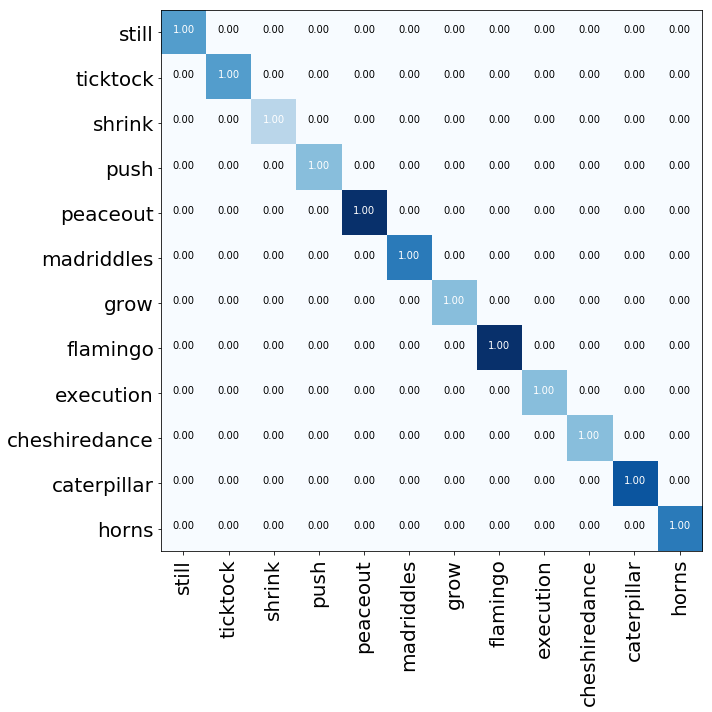

In [11]:
confusion_matrix(save_path,new_gesture_name)